In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)



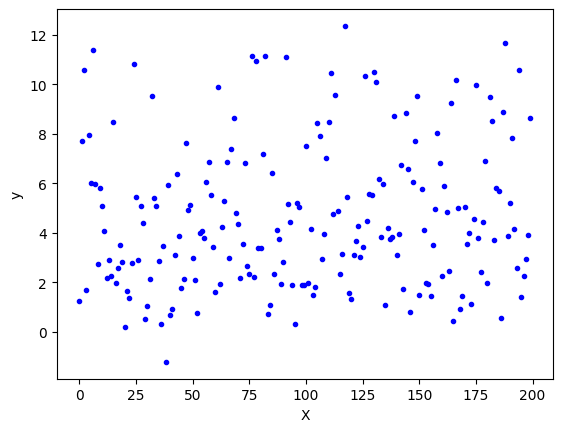

In [3]:
plt.plot(y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred=lr.predict(X_test)

In [7]:
print(r2_score(y_test,y_pred))

0.3483172466364436


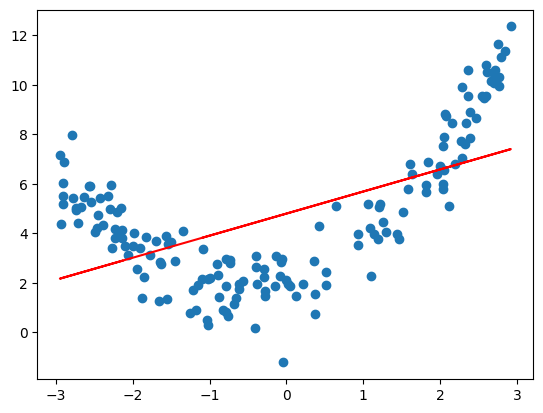

In [8]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.show()

In [9]:
pol=PolynomialFeatures(degree=2,include_bias=False)
X_train_pol=pol.fit_transform(X_train)
X_test_pol=pol.transform(X_test)


In [10]:
lr=LinearRegression()
lr.fit(X_train_pol,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred2=lr.predict(X_test_pol)

In [12]:
print(r2_score(y_test,y_pred2))

0.8869671391832707


In [14]:
print("coef",lr.coef_)
print("intercept",lr.intercept_)

coef [[0.89424601 0.81332292]]
intercept [2.02568335]


In [20]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_pol=pol.transform(X_new)
y_new=lr.predict(X_new_pol)


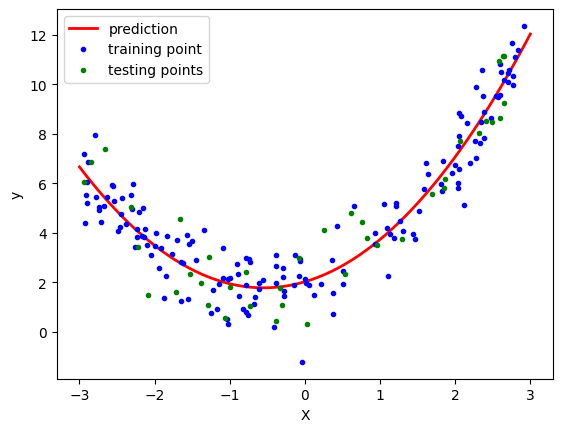

In [24]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="prediction")
plt.plot(X_train,y_train,"b.",label='training point')
plt.plot(X_test,y_test,"g.",label='testing points')
plt.xlabel("X")
plt.ylabel('y')
plt.legend()
plt.show()

In [37]:

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = pol.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

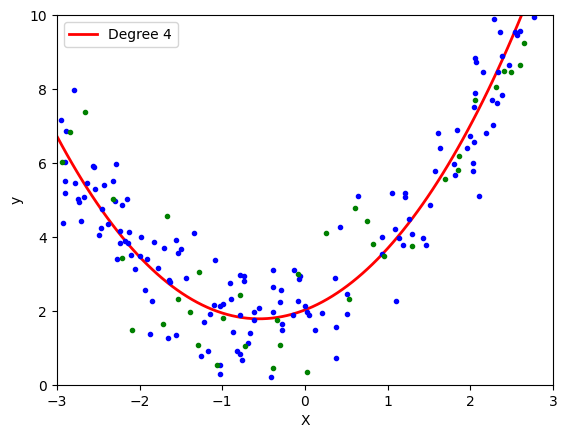

In [40]:
polynomial_regression(4)